In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!pip install fastai
!pip install pathlib
!pip install kaggle
!apt-get install unzip

    100% |████████████████████████████████| 122kB 6.4MB/s 
    100% |████████████████████████████████| 1.5MB 12.5MB/s 
    100% |████████████████████████████████| 51kB 12.8MB/s 
    100% |████████████████████████████████| 51kB 18.4MB/s 
    5% |█▊                              | 26.1MB 34.5MB/s eta 0:00:14

    100% |████████████████████████████████| 496.4MB 35kB/s 
    100% |████████████████████████████████| 3.4MB 11.4MB/s 
    100% |████████████████████████████████| 174kB 23.6MB/s 
    100% |████████████████████████████████| 61kB 14.3MB/s 
    100% |████████████████████████████████| 2.2MB 15.9MB/s 
    100% |████████████████████████████████| 112kB 20.1MB/s 
    100% |████████████████████████████████| 112kB 25.4MB/s 
    33% |██████████▋                     | 4.5MB 39.7MB/s eta 0:00:01

    100% |████████████████████████████████| 13.7MB 5.1MB/s 
    100% |████████████████████████████████| 71kB 21.6MB/s 
    100% |████████████████████████████████| 92kB 17.1MB/s 
    100% |████████████████████████████████| 81kB 18.6MB/s 
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | /

 - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for torchtext ... - \ done
  Stored in directory: /content/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
Successfully built feather-format bcolz torchtext pandas-summary
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
    100% |████████████████████████████████| 51kB 3.4MB/s 
  Running setup.py bdist_wheel f

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
#Download the dataset
!wget http://files.fast.ai/data/dogscats.zip

--2018-06-08 10:05:19--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  35.6MB/s    in 23s     

2018-06-08 10:05:43 (34.8 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



In [0]:
mkdir /content/data

In [6]:
#Unzip files in train zip file to the data folder
!unzip /content/dogscats.zip -d /content/data

Archive:  /content/dogscats.zip
   creating: /content/data/dogscats/
   creating: /content/data/dogscats/sample/
   creating: /content/data/dogscats/sample/train/
   creating: /content/data/dogscats/sample/train/cats/
  inflating: /content/data/dogscats/sample/train/cats/cat.2921.jpg  
  inflating: /content/data/dogscats/sample/train/cats/cat.394.jpg  
  inflating: /content/data/dogscats/sample/train/cats/cat.4865.jpg  
  inflating: /content/data/dogscats/sample/train/cats/cat.3570.jpg  
  inflating: /content/data/dogscats/sample/train/cats/cat.2266.jpg  
  inflating: /content/data/dogscats/sample/train/cats/cat.9021.jpg  
  inflating: /content/data/dogscats/sample/train/cats/cat.11737.jpg  
  inflating: /content/data/dogscats/sample/train/cats/cat.4600.jpg  
   creating: /content/data/dogscats/sample/train/dogs/
  inflating: /content/data/dogscats/sample/train/dogs/dog.1402.jpg  
  inflating: /content/data/dogscats/sample/train/dogs/dog.1614.jpg  
  inflating: /content/data/dogscats/s


  inflating: /content/data/dogscats/train/cats/cat.5984.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9082.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11933.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5405.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11222.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11739.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9221.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8868.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1795.jpg  
  inflating: /content/data/dogscats/train/cats/cat.253.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11852.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8341.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1348.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6351.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4718.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9892.jpg  
  in


  inflating: /content/data/dogscats/train/cats/cat.7419.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2073.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1292.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7124.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1382.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3533.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10270.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10390.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11639.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8251.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5845.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1077.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6459.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10126.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2589.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5003.jpg  
  i

  inflating: /content/data/dogscats/train/cats/cat.2915.jpg  
  inflating: /content/data/dogscats/train/cats/cat.472.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2708.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9217.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9746.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10040.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3763.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11845.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9492.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7479.jpg  
  inflating: /content/data/dogscats/train/cats/cat.701.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3702.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3696.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5969.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11469.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1939.jpg  
  infla


  inflating: /content/data/dogscats/train/cats/cat.2833.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12024.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1685.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1634.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9878.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1254.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10446.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5608.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6371.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5695.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4365.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9493.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2512.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6034.jpg  
  inflating: /content/data/dogscats/train/cats/cat.84.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7512.jpg  
  infla

  inflating: /content/data/dogscats/train/cats/cat.4474.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10892.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7697.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6424.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11174.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9890.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8196.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3429.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2642.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10503.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7405.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8113.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4734.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12013.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8170.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8824.jpg  
  in

  inflating: /content/data/dogscats/train/cats/cat.3199.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4523.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6237.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5836.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9996.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11738.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2758.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10352.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2516.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3418.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6932.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2738.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11333.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4334.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5134.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9470.jpg  
  inf

  inflating: /content/data/dogscats/train/cats/cat.5161.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11414.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7885.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11007.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1039.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6703.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9600.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6494.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1423.jpg  
  inflating: /content/data/dogscats/train/cats/cat.242.jpg  
  inflating: /content/data/dogscats/train/cats/cat.741.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12178.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10622.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8389.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4863.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1221.jpg  
  infl


  inflating: /content/data/dogscats/train/cats/cat.2844.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6783.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5656.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2145.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11051.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2001.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11301.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11624.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10630.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6378.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11257.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4665.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2835.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7161.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7267.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7746.jpg  
  


  inflating: /content/data/dogscats/train/cats/cat.7088.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6143.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1053.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8767.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1938.jpg  
  inflating: /content/data/dogscats/train/cats/cat.892.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11787.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1187.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5266.jpg  
  inflating: /content/data/dogscats/train/cats/cat.937.jpg  
  inflating: /content/data/dogscats/train/cats/cat.816.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3181.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5588.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4133.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5645.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8429.jpg  
  inflati

  inflating: /content/data/dogscats/train/cats/cat.11525.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5428.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9335.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6750.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11125.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11486.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11064.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3944.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6279.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3349.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7601.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11053.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10644.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8885.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2416.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8169.jpg  
  

  inflating: /content/data/dogscats/train/cats/cat.7704.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3947.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8681.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6721.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5721.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3280.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9049.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9728.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4126.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4298.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8310.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6604.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8026.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7613.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5926.jpg  
  inflating: /content/data/dogscats/train/cats/cat.654.jpg  
  inflati

  inflating: /content/data/dogscats/train/cats/cat.7165.jpg  
  inflating: /content/data/dogscats/train/cats/cat.819.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11708.jpg  
  inflating: /content/data/dogscats/train/cats/cat.96.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3308.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10360.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1536.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9543.jpg  
  inflating: /content/data/dogscats/train/cats/cat.88.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4953.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7960.jpg  
  inflating: /content/data/dogscats/train/cats/cat.643.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4042.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4247.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9976.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7847.jpg  
  inflating:


  inflating: /content/data/dogscats/train/cats/cat.5307.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10980.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6947.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4789.jpg  
  inflating: /content/data/dogscats/train/cats/cat.82.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1084.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9941.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4492.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2667.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1781.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2111.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3672.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4686.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11306.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7711.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7530.jpg  
  infla

  inflating: /content/data/dogscats/train/cats/cat.551.jpg  
  inflating: /content/data/dogscats/train/cats/cat.567.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8890.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11619.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8434.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2373.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5915.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3775.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10113.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9039.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9846.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8145.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6981.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3385.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2963.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10616.jpg  
  infla

  inflating: /content/data/dogscats/train/cats/cat.1081.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7674.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3592.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9288.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4846.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5110.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4998.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6235.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8176.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1011.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11872.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11504.jpg  
  inflating: /content/data/dogscats/train/cats/cat.484.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11314.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3709.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11725.jpg  
  inf

  inflating: /content/data/dogscats/train/cats/cat.8436.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1353.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3422.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11385.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9858.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3911.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5400.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6455.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7302.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9452.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4809.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1371.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2020.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8682.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3569.jpg  
  inflating: /content/data/dogscats/train/cats/cat.923.jpg  
  inflat


  inflating: /content/data/dogscats/train/cats/cat.4570.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1293.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5831.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12354.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5156.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1927.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10563.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7660.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6085.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11897.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8254.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3016.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1289.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6862.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4274.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4244.jpg  
  in


  inflating: /content/data/dogscats/train/cats/cat.4412.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1361.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11415.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7640.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1954.jpg  
  inflating: /content/data/dogscats/train/cats/cat.214.jpg  
  inflating: /content/data/dogscats/train/cats/cat.886.jpg  
  inflating: /content/data/dogscats/train/cats/cat.865.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11685.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10308.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1649.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4798.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1961.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11186.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9382.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12334.jpg  
  inf


  inflating: /content/data/dogscats/train/cats/cat.1060.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6565.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10436.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3196.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2907.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5327.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5571.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2753.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4427.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7540.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4417.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6251.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10513.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4589.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3715.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11669.jpg  
  in


  inflating: /content/data/dogscats/train/cats/cat.219.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10074.jpg  
  inflating: /content/data/dogscats/train/cats/cat.795.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9868.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9851.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12111.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3293.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11201.jpg  
  inflating: /content/data/dogscats/train/cats/cat.464.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4588.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7790.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11057.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6920.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1578.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3101.jpg  
  inflat

  inflating: /content/data/dogscats/train/cats/cat.8462.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6012.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8027.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6097.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8182.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12218.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4610.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7352.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2700.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9349.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8652.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5905.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9817.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5742.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1393.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8062.jpg  
  infla


  inflating: /content/data/dogscats/train/dogs/dog.10948.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7717.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10670.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11072.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5290.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4821.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2089.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12416.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9964.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11650.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9468.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7730.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.967.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9294.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7848.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9192.jpg  
  i

  inflating: /content/data/dogscats/train/dogs/dog.8401.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6517.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11257.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10503.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9741.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8225.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.771.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8243.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8273.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8020.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11183.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5528.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5158.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4705.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3620.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5182.jpg  
  infl


  inflating: /content/data/dogscats/train/dogs/dog.2007.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10603.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7740.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2509.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3851.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1688.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11913.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7819.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7657.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.54.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12198.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6543.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12176.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3098.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9071.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7992.jpg  
  inf


  inflating: /content/data/dogscats/train/dogs/dog.342.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8604.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11246.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11114.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11847.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9352.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10733.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9028.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10494.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.418.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2443.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12222.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2406.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11967.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7111.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5867.jpg  
  


  inflating: /content/data/dogscats/train/dogs/dog.213.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6993.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5880.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11120.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2604.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7561.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11282.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11002.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11217.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7731.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5932.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2565.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2296.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1622.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3448.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9567.jpg  
  in

  inflating: /content/data/dogscats/train/dogs/dog.11263.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1381.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7319.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5361.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4396.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8675.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2051.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.984.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6200.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6900.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9847.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5023.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4237.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2814.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3591.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4970.jpg  
  inflat


  inflating: /content/data/dogscats/train/dogs/dog.8699.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3477.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3146.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5509.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4086.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2253.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4742.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8407.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7861.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2682.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2601.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10271.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.230.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2500.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.671.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.77.jpg  
  inflatin

  inflating: /content/data/dogscats/train/dogs/dog.10150.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2894.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10810.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8144.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8441.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6625.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1349.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4411.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1820.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5601.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7880.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.224.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7398.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7706.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5468.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9511.jpg  
  infla

  inflating: /content/data/dogscats/train/dogs/dog.267.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.705.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.181.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4259.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3388.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9796.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8013.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3348.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3458.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7724.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7423.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7994.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.62.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11328.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1660.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2482.jpg  
  inflating:


  inflating: /content/data/dogscats/train/dogs/dog.10522.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11764.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11735.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2301.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1283.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11354.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6814.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4406.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3705.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.114.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12484.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4797.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.56.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7433.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1895.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7536.jpg  
  inf

  inflating: /content/data/dogscats/train/dogs/dog.10257.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5404.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8858.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11031.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4190.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2886.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3174.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12242.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10492.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8075.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2417.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4513.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.157.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7860.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10624.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9549.jpg  
  in


  inflating: /content/data/dogscats/train/dogs/dog.1587.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1118.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7253.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.780.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5551.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8442.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12098.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4173.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4683.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1937.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3072.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11271.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5752.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3132.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2612.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11739.jpg  
  inf

  inflating: /content/data/dogscats/train/dogs/dog.10253.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5705.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3068.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11745.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5816.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5016.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5663.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6995.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3733.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5941.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10043.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6480.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5684.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1177.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4545.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.132.jpg  
  infl


  inflating: /content/data/dogscats/train/dogs/dog.2133.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8198.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11458.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10896.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.69.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2799.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1908.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7063.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8167.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11356.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10682.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1394.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9253.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8489.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1515.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4964.jpg  
  inf


  inflating: /content/data/dogscats/train/dogs/dog.8278.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5006.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4900.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3763.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6503.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6155.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9815.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6271.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.916.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.528.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3871.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7550.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6241.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5140.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2749.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2686.jpg  
  inflati


  inflating: /content/data/dogscats/train/dogs/dog.8838.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2765.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4721.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1436.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3902.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4114.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2890.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6561.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1992.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2224.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8813.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6464.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8344.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1454.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10644.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4800.jpg  
  infl


  inflating: /content/data/dogscats/train/dogs/dog.695.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10286.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10818.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11978.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12316.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2946.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12037.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11987.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.468.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12052.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4214.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1429.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11776.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9438.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9529.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9673.jpg  
 

  inflating: /content/data/dogscats/train/dogs/dog.6935.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9330.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.578.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2934.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11348.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6157.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3457.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10888.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6902.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8695.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11876.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2481.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7896.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12405.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2286.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7027.jpg  
  inf

  inflating: /content/data/dogscats/train/dogs/dog.10884.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11659.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.474.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2739.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11291.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4983.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1378.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.615.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7799.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.694.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3270.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3774.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11865.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6796.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2778.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12256.jpg  
  infl


  inflating: /content/data/dogscats/train/dogs/dog.9732.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9797.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4577.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10784.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11013.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3493.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5545.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9651.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6735.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11139.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6259.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10061.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2374.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5172.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2074.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2112.jpg  
  i

  inflating: /content/data/dogscats/train/dogs/dog.10558.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2828.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3280.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5919.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9418.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5100.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1031.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5918.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9052.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4325.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11138.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6373.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9467.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11276.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4555.jpg  
   creating: /content/data/dogscats/valid/
   creating: /content/da


  inflating: /content/data/dogscats/valid/cats/cat.8712.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.8468.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.3477.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.4646.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.6162.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.11059.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.8175.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.604.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.10588.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.11467.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.10749.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.4564.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.965.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.7657.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.4057.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.7175.jpg  
  inf


  inflating: /content/data/dogscats/valid/dogs/dog.7727.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.3.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.9746.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.12160.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.11478.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.3067.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.4936.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.3768.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.790.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.10873.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.703.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.1014.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.3832.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.4275.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.6671.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.7489.jpg  
  inflati

  inflating: /content/data/dogscats/valid/dogs/dog.10516.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.10551.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.1249.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.1049.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.11012.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.3116.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.10427.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.635.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.2377.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.7669.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.2019.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.3707.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.8089.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.5798.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.4253.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.5724.jpg  
  inf


  inflating: /content/data/dogscats/test1/5981.jpg  
  inflating: /content/data/dogscats/test1/10627.jpg  
  inflating: /content/data/dogscats/test1/3946.jpg  
  inflating: /content/data/dogscats/test1/11705.jpg  
  inflating: /content/data/dogscats/test1/4364.jpg  
  inflating: /content/data/dogscats/test1/5768.jpg  
  inflating: /content/data/dogscats/test1/7979.jpg  
  inflating: /content/data/dogscats/test1/12163.jpg  
  inflating: /content/data/dogscats/test1/10556.jpg  
  inflating: /content/data/dogscats/test1/7381.jpg  
  inflating: /content/data/dogscats/test1/683.jpg  
  inflating: /content/data/dogscats/test1/3062.jpg  
  inflating: /content/data/dogscats/test1/19.jpg  
  inflating: /content/data/dogscats/test1/2808.jpg  
  inflating: /content/data/dogscats/test1/6824.jpg  
  inflating: /content/data/dogscats/test1/8312.jpg  
  inflating: /content/data/dogscats/test1/9277.jpg  
  inflating: /content/data/dogscats/test1/7889.jpg  
  inflating: /content/data/dogscats/test1/10


  inflating: /content/data/dogscats/test1/3492.jpg  
  inflating: /content/data/dogscats/test1/9078.jpg  
  inflating: /content/data/dogscats/test1/1514.jpg  
  inflating: /content/data/dogscats/test1/3445.jpg  
  inflating: /content/data/dogscats/test1/6177.jpg  
  inflating: /content/data/dogscats/test1/2466.jpg  
  inflating: /content/data/dogscats/test1/7954.jpg  
  inflating: /content/data/dogscats/test1/7316.jpg  
  inflating: /content/data/dogscats/test1/3112.jpg  
  inflating: /content/data/dogscats/test1/5751.jpg  
  inflating: /content/data/dogscats/test1/6433.jpg  
  inflating: /content/data/dogscats/test1/1296.jpg  
  inflating: /content/data/dogscats/test1/5094.jpg  
  inflating: /content/data/dogscats/test1/7053.jpg  
  inflating: /content/data/dogscats/test1/10662.jpg  
  inflating: /content/data/dogscats/test1/5593.jpg  
  inflating: /content/data/dogscats/test1/3906.jpg  
  inflating: /content/data/dogscats/test1/3095.jpg  
  inflating: /content/data/dogscats/test1/43


  inflating: /content/data/dogscats/test1/11721.jpg  
  inflating: /content/data/dogscats/test1/8534.jpg  
  inflating: /content/data/dogscats/test1/4579.jpg  
  inflating: /content/data/dogscats/test1/5321.jpg  
  inflating: /content/data/dogscats/test1/9733.jpg  
  inflating: /content/data/dogscats/test1/7275.jpg  
  inflating: /content/data/dogscats/test1/767.jpg  
  inflating: /content/data/dogscats/test1/1892.jpg  
  inflating: /content/data/dogscats/test1/6117.jpg  
  inflating: /content/data/dogscats/test1/6272.jpg  
  inflating: /content/data/dogscats/test1/363.jpg  
  inflating: /content/data/dogscats/test1/1179.jpg  
  inflating: /content/data/dogscats/test1/10028.jpg  
  inflating: /content/data/dogscats/test1/2067.jpg  
  inflating: /content/data/dogscats/test1/10465.jpg  
  inflating: /content/data/dogscats/test1/5490.jpg  
  inflating: /content/data/dogscats/test1/2857.jpg  
  inflating: /content/data/dogscats/test1/2815.jpg  
  inflating: /content/data/dogscats/test1/91

  inflating: /content/data/dogscats/test1/9536.jpg  
  inflating: /content/data/dogscats/test1/11033.jpg  
  inflating: /content/data/dogscats/test1/4897.jpg  
  inflating: /content/data/dogscats/test1/8326.jpg  
  inflating: /content/data/dogscats/test1/10096.jpg  
  inflating: /content/data/dogscats/test1/11804.jpg  
  inflating: /content/data/dogscats/test1/5667.jpg  
  inflating: /content/data/dogscats/test1/5174.jpg  
  inflating: /content/data/dogscats/test1/7529.jpg  
  inflating: /content/data/dogscats/test1/5031.jpg  
  inflating: /content/data/dogscats/test1/8573.jpg  
  inflating: /content/data/dogscats/test1/6382.jpg  
  inflating: /content/data/dogscats/test1/12344.jpg  
  inflating: /content/data/dogscats/test1/4209.jpg  
  inflating: /content/data/dogscats/test1/2650.jpg  
  inflating: /content/data/dogscats/test1/8777.jpg  
  inflating: /content/data/dogscats/test1/2883.jpg  
  inflating: /content/data/dogscats/test1/8320.jpg  
  inflating: /content/data/dogscats/test1/


  inflating: /content/data/dogscats/test1/9441.jpg  
  inflating: /content/data/dogscats/test1/5693.jpg  
  inflating: /content/data/dogscats/test1/11937.jpg  
  inflating: /content/data/dogscats/test1/3184.jpg  
  inflating: /content/data/dogscats/test1/2776.jpg  
  inflating: /content/data/dogscats/test1/2987.jpg  
  inflating: /content/data/dogscats/test1/5221.jpg  
  inflating: /content/data/dogscats/test1/5431.jpg  
  inflating: /content/data/dogscats/test1/8513.jpg  
  inflating: /content/data/dogscats/test1/8892.jpg  
  inflating: /content/data/dogscats/test1/10750.jpg  
  inflating: /content/data/dogscats/test1/10108.jpg  
  inflating: /content/data/dogscats/test1/4275.jpg  
  inflating: /content/data/dogscats/test1/10958.jpg  
  inflating: /content/data/dogscats/test1/1585.jpg  
  inflating: /content/data/dogscats/test1/10203.jpg  
  inflating: /content/data/dogscats/test1/7720.jpg  
  inflating: /content/data/dogscats/test1/7649.jpg  
  inflating: /content/data/dogscats/test

  inflating: /content/data/dogscats/test1/680.jpg  
  inflating: /content/data/dogscats/test1/1864.jpg  
  inflating: /content/data/dogscats/test1/10434.jpg  
  inflating: /content/data/dogscats/test1/1445.jpg  
  inflating: /content/data/dogscats/test1/10935.jpg  
  inflating: /content/data/dogscats/test1/5861.jpg  
  inflating: /content/data/dogscats/test1/9457.jpg  
  inflating: /content/data/dogscats/test1/3050.jpg  
  inflating: /content/data/dogscats/test1/5250.jpg  
  inflating: /content/data/dogscats/test1/9756.jpg  
  inflating: /content/data/dogscats/test1/4756.jpg  
  inflating: /content/data/dogscats/test1/12449.jpg  
  inflating: /content/data/dogscats/test1/11557.jpg  
  inflating: /content/data/dogscats/test1/11387.jpg  
  inflating: /content/data/dogscats/test1/5726.jpg  
  inflating: /content/data/dogscats/test1/1984.jpg  
  inflating: /content/data/dogscats/test1/2360.jpg  
  inflating: /content/data/dogscats/test1/12045.jpg  
  inflating: /content/data/dogscats/test1

  inflating: /content/data/dogscats/test1/12232.jpg  
  inflating: /content/data/dogscats/test1/1708.jpg  
  inflating: /content/data/dogscats/test1/3374.jpg  
  inflating: /content/data/dogscats/test1/8726.jpg  
  inflating: /content/data/dogscats/test1/10328.jpg  
  inflating: /content/data/dogscats/test1/27.jpg  
  inflating: /content/data/dogscats/test1/170.jpg  
  inflating: /content/data/dogscats/test1/11238.jpg  
  inflating: /content/data/dogscats/test1/1594.jpg  
  inflating: /content/data/dogscats/test1/4084.jpg  
  inflating: /content/data/dogscats/test1/11676.jpg  
  inflating: /content/data/dogscats/test1/917.jpg  
  inflating: /content/data/dogscats/test1/1849.jpg  
  inflating: /content/data/dogscats/test1/57.jpg  
  inflating: /content/data/dogscats/test1/6676.jpg  
  inflating: /content/data/dogscats/test1/5072.jpg  
  inflating: /content/data/dogscats/test1/8111.jpg  
  inflating: /content/data/dogscats/test1/7129.jpg  
  inflating: /content/data/dogscats/test1/4809.j


  inflating: /content/data/dogscats/test1/7424.jpg  
  inflating: /content/data/dogscats/test1/3721.jpg  
  inflating: /content/data/dogscats/test1/9995.jpg  
  inflating: /content/data/dogscats/test1/20.jpg  
  inflating: /content/data/dogscats/test1/7538.jpg  
  inflating: /content/data/dogscats/test1/6497.jpg  
  inflating: /content/data/dogscats/test1/10706.jpg  
  inflating: /content/data/dogscats/test1/5888.jpg  
  inflating: /content/data/dogscats/test1/12.jpg  
  inflating: /content/data/dogscats/test1/4811.jpg  
  inflating: /content/data/dogscats/test1/8134.jpg  
  inflating: /content/data/dogscats/test1/9449.jpg  
  inflating: /content/data/dogscats/test1/7519.jpg  
  inflating: /content/data/dogscats/test1/539.jpg  
  inflating: /content/data/dogscats/test1/9230.jpg  
  inflating: /content/data/dogscats/test1/11170.jpg  
  inflating: /content/data/dogscats/test1/2090.jpg  
  inflating: /content/data/dogscats/test1/5265.jpg  
  inflating: /content/data/dogscats/test1/3397.j

  inflating: /content/data/dogscats/test1/5637.jpg  
  inflating: /content/data/dogscats/test1/2386.jpg  
  inflating: /content/data/dogscats/test1/10392.jpg  
  inflating: /content/data/dogscats/test1/9254.jpg  
  inflating: /content/data/dogscats/test1/4890.jpg  
  inflating: /content/data/dogscats/test1/721.jpg  
  inflating: /content/data/dogscats/test1/4079.jpg  
  inflating: /content/data/dogscats/test1/4499.jpg  
  inflating: /content/data/dogscats/test1/11495.jpg  
  inflating: /content/data/dogscats/test1/3034.jpg  
  inflating: /content/data/dogscats/test1/1606.jpg  
  inflating: /content/data/dogscats/test1/2317.jpg  
  inflating: /content/data/dogscats/test1/11034.jpg  
  inflating: /content/data/dogscats/test1/12170.jpg  
  inflating: /content/data/dogscats/test1/10481.jpg  
  inflating: /content/data/dogscats/test1/7703.jpg  
  inflating: /content/data/dogscats/test1/3523.jpg  
  inflating: /content/data/dogscats/test1/2977.jpg  
  inflating: /content/data/dogscats/test1/


  inflating: /content/data/dogscats/test1/5010.jpg  
  inflating: /content/data/dogscats/test1/9626.jpg  
  inflating: /content/data/dogscats/test1/7625.jpg  
  inflating: /content/data/dogscats/test1/5594.jpg  
  inflating: /content/data/dogscats/test1/2572.jpg  
  inflating: /content/data/dogscats/test1/8933.jpg  
  inflating: /content/data/dogscats/test1/11598.jpg  
  inflating: /content/data/dogscats/test1/1450.jpg  
  inflating: /content/data/dogscats/test1/10455.jpg  
  inflating: /content/data/dogscats/test1/12237.jpg  
  inflating: /content/data/dogscats/test1/2954.jpg  
  inflating: /content/data/dogscats/test1/879.jpg  
  inflating: /content/data/dogscats/test1/5860.jpg  
  inflating: /content/data/dogscats/test1/7386.jpg  
  inflating: /content/data/dogscats/test1/11849.jpg  
  inflating: /content/data/dogscats/test1/11002.jpg  
  inflating: /content/data/dogscats/test1/8926.jpg  
  inflating: /content/data/dogscats/test1/4567.jpg  
  inflating: /content/data/dogscats/test1


  inflating: /content/data/dogscats/test1/9965.jpg  
  inflating: /content/data/dogscats/test1/7873.jpg  
  inflating: /content/data/dogscats/test1/7946.jpg  
  inflating: /content/data/dogscats/test1/6157.jpg  
  inflating: /content/data/dogscats/test1/3163.jpg  
  inflating: /content/data/dogscats/test1/10090.jpg  
  inflating: /content/data/dogscats/test1/3009.jpg  
  inflating: /content/data/dogscats/test1/1627.jpg  
  inflating: /content/data/dogscats/test1/4568.jpg  
  inflating: /content/data/dogscats/test1/12136.jpg  
  inflating: /content/data/dogscats/test1/1947.jpg  
  inflating: /content/data/dogscats/test1/4136.jpg  
  inflating: /content/data/dogscats/test1/5251.jpg  
  inflating: /content/data/dogscats/test1/2417.jpg  
  inflating: /content/data/dogscats/test1/2233.jpg  
  inflating: /content/data/dogscats/test1/8344.jpg  
  inflating: /content/data/dogscats/test1/6388.jpg  
  inflating: /content/data/dogscats/test1/4633.jpg  
  inflating: /content/data/dogscats/test1/2

  inflating: /content/data/dogscats/test1/2166.jpg  
  inflating: /content/data/dogscats/test1/898.jpg  
  inflating: /content/data/dogscats/test1/5879.jpg  
  inflating: /content/data/dogscats/test1/9775.jpg  
  inflating: /content/data/dogscats/test1/2293.jpg  
  inflating: /content/data/dogscats/test1/11345.jpg  
  inflating: /content/data/dogscats/test1/9158.jpg  
  inflating: /content/data/dogscats/test1/6070.jpg  
  inflating: /content/data/dogscats/test1/396.jpg  
  inflating: /content/data/dogscats/test1/11811.jpg  
  inflating: /content/data/dogscats/test1/9652.jpg  
  inflating: /content/data/dogscats/test1/2533.jpg  
  inflating: /content/data/dogscats/test1/11720.jpg  
  inflating: /content/data/dogscats/test1/7754.jpg  
  inflating: /content/data/dogscats/test1/2484.jpg  
  inflating: /content/data/dogscats/test1/1275.jpg  
  inflating: /content/data/dogscats/test1/203.jpg  
  inflating: /content/data/dogscats/test1/1018.jpg  
  inflating: /content/data/dogscats/test1/8015


  inflating: /content/data/dogscats/test1/8482.jpg  
  inflating: /content/data/dogscats/test1/10927.jpg  
  inflating: /content/data/dogscats/test1/9632.jpg  
  inflating: /content/data/dogscats/test1/12081.jpg  
  inflating: /content/data/dogscats/test1/3533.jpg  
  inflating: /content/data/dogscats/test1/8465.jpg  
  inflating: /content/data/dogscats/test1/1848.jpg  
  inflating: /content/data/dogscats/test1/4374.jpg  
  inflating: /content/data/dogscats/test1/3424.jpg  
  inflating: /content/data/dogscats/test1/2227.jpg  
  inflating: /content/data/dogscats/test1/11421.jpg  
  inflating: /content/data/dogscats/test1/5396.jpg  
  inflating: /content/data/dogscats/test1/6034.jpg  
  inflating: /content/data/dogscats/test1/4800.jpg  
  inflating: /content/data/dogscats/test1/3796.jpg  
  inflating: /content/data/dogscats/test1/149.jpg  
  inflating: /content/data/dogscats/test1/8468.jpg  
  inflating: /content/data/dogscats/test1/7265.jpg  
  inflating: /content/data/dogscats/test1/2

  inflating: /content/data/dogscats/test1/9116.jpg  
  inflating: /content/data/dogscats/test1/8066.jpg  
  inflating: /content/data/dogscats/test1/11933.jpg  
  inflating: /content/data/dogscats/test1/7459.jpg  
  inflating: /content/data/dogscats/test1/5160.jpg  
  inflating: /content/data/dogscats/test1/2343.jpg  
  inflating: /content/data/dogscats/test1/6716.jpg  
  inflating: /content/data/dogscats/test1/11269.jpg  
  inflating: /content/data/dogscats/test1/3494.jpg  
  inflating: /content/data/dogscats/test1/11876.jpg  
  inflating: /content/data/dogscats/test1/9255.jpg  
  inflating: /content/data/dogscats/test1/4434.jpg  
  inflating: /content/data/dogscats/test1/10278.jpg  
  inflating: /content/data/dogscats/test1/2151.jpg  
  inflating: /content/data/dogscats/test1/8222.jpg  
  inflating: /content/data/dogscats/test1/4834.jpg  
  inflating: /content/data/dogscats/test1/1725.jpg  
  inflating: /content/data/dogscats/test1/6237.jpg  
  inflating: /content/data/dogscats/test1/

  inflating: /content/data/dogscats/test1/8460.jpg  
  inflating: /content/data/dogscats/test1/2134.jpg  
  inflating: /content/data/dogscats/test1/4938.jpg  
  inflating: /content/data/dogscats/test1/4373.jpg  
  inflating: /content/data/dogscats/test1/1511.jpg  
  inflating: /content/data/dogscats/test1/5258.jpg  
  inflating: /content/data/dogscats/test1/2834.jpg  
  inflating: /content/data/dogscats/test1/3998.jpg  
  inflating: /content/data/dogscats/test1/5586.jpg  
  inflating: /content/data/dogscats/test1/635.jpg  
  inflating: /content/data/dogscats/test1/4708.jpg  
  inflating: /content/data/dogscats/test1/6045.jpg  
  inflating: /content/data/dogscats/test1/4429.jpg  
  inflating: /content/data/dogscats/test1/2898.jpg  
  inflating: /content/data/dogscats/test1/12251.jpg  
  inflating: /content/data/dogscats/test1/4977.jpg  
  inflating: /content/data/dogscats/test1/8277.jpg  
  inflating: /content/data/dogscats/test1/5412.jpg  
  inflating: /content/data/dogscats/test1/2557

  inflating: /content/data/dogscats/test1/6155.jpg  
  inflating: /content/data/dogscats/test1/9499.jpg  
  inflating: /content/data/dogscats/test1/5999.jpg  
  inflating: /content/data/dogscats/test1/3204.jpg  
  inflating: /content/data/dogscats/test1/2600.jpg  
  inflating: /content/data/dogscats/test1/7838.jpg  
  inflating: /content/data/dogscats/test1/6080.jpg  
  inflating: /content/data/dogscats/test1/12239.jpg  
  inflating: /content/data/dogscats/test1/10678.jpg  
  inflating: /content/data/dogscats/test1/6706.jpg  
  inflating: /content/data/dogscats/test1/4286.jpg  
  inflating: /content/data/dogscats/test1/11748.jpg  
  inflating: /content/data/dogscats/test1/3751.jpg  
  inflating: /content/data/dogscats/test1/10417.jpg  
  inflating: /content/data/dogscats/test1/285.jpg  
  inflating: /content/data/dogscats/test1/6702.jpg  
  inflating: /content/data/dogscats/test1/5016.jpg  
  inflating: /content/data/dogscats/test1/490.jpg  
  inflating: /content/data/dogscats/test1/68


  inflating: /content/data/dogscats/test1/5833.jpg  
  inflating: /content/data/dogscats/test1/11389.jpg  
  inflating: /content/data/dogscats/test1/8343.jpg  
  inflating: /content/data/dogscats/test1/7801.jpg  
  inflating: /content/data/dogscats/test1/7847.jpg  
  inflating: /content/data/dogscats/test1/6614.jpg  
  inflating: /content/data/dogscats/test1/4639.jpg  
  inflating: /content/data/dogscats/test1/8729.jpg  
  inflating: /content/data/dogscats/test1/772.jpg  
  inflating: /content/data/dogscats/test1/4292.jpg  
  inflating: /content/data/dogscats/test1/12019.jpg  
  inflating: /content/data/dogscats/test1/10333.jpg  
  inflating: /content/data/dogscats/test1/11514.jpg  
  inflating: /content/data/dogscats/test1/3119.jpg  
  inflating: /content/data/dogscats/test1/8150.jpg  
  inflating: /content/data/dogscats/test1/1021.jpg  
  inflating: /content/data/dogscats/test1/7446.jpg  
  inflating: /content/data/dogscats/test1/9196.jpg  
  inflating: /content/data/dogscats/test1/


  inflating: /content/data/dogscats/test1/3162.jpg  
  inflating: /content/data/dogscats/test1/6220.jpg  
  inflating: /content/data/dogscats/test1/7030.jpg  
  inflating: /content/data/dogscats/test1/2099.jpg  
  inflating: /content/data/dogscats/test1/5196.jpg  
  inflating: /content/data/dogscats/test1/11500.jpg  
  inflating: /content/data/dogscats/test1/3851.jpg  
  inflating: /content/data/dogscats/test1/2565.jpg  
  inflating: /content/data/dogscats/test1/7566.jpg  
  inflating: /content/data/dogscats/test1/8760.jpg  
  inflating: /content/data/dogscats/test1/4158.jpg  
  inflating: /content/data/dogscats/test1/5435.jpg  
  inflating: /content/data/dogscats/test1/11789.jpg  
  inflating: /content/data/dogscats/test1/11742.jpg  
  inflating: /content/data/dogscats/test1/11329.jpg  
  inflating: /content/data/dogscats/test1/2381.jpg  
  inflating: /content/data/dogscats/test1/9107.jpg  
  inflating: /content/data/dogscats/test1/453.jpg  
  inflating: /content/data/dogscats/test1/


  inflating: /content/data/dogscats/test1/9314.jpg  
  inflating: /content/data/dogscats/test1/3735.jpg  
  inflating: /content/data/dogscats/test1/8924.jpg  
  inflating: /content/data/dogscats/test1/1794.jpg  
  inflating: /content/data/dogscats/test1/2514.jpg  
  inflating: /content/data/dogscats/test1/3984.jpg  
  inflating: /content/data/dogscats/test1/892.jpg  
  inflating: /content/data/dogscats/test1/3688.jpg  
  inflating: /content/data/dogscats/test1/11019.jpg  
  inflating: /content/data/dogscats/test1/8994.jpg  
  inflating: /content/data/dogscats/test1/3377.jpg  
  inflating: /content/data/dogscats/test1/10355.jpg  
  inflating: /content/data/dogscats/test1/7419.jpg  
  inflating: /content/data/dogscats/test1/6507.jpg  
  inflating: /content/data/dogscats/test1/4947.jpg  
  inflating: /content/data/dogscats/test1/8214.jpg  
  inflating: /content/data/dogscats/test1/2837.jpg  
  inflating: /content/data/dogscats/test1/2902.jpg  
  inflating: /content/data/dogscats/test1/58

  inflating: /content/data/dogscats/test1/10559.jpg  
  inflating: /content/data/dogscats/test1/7803.jpg  
  inflating: /content/data/dogscats/test1/528.jpg  
  inflating: /content/data/dogscats/test1/11607.jpg  
  inflating: /content/data/dogscats/test1/3981.jpg  
  inflating: /content/data/dogscats/test1/3886.jpg  
  inflating: /content/data/dogscats/test1/6619.jpg  
  inflating: /content/data/dogscats/test1/1783.jpg  
  inflating: /content/data/dogscats/test1/2913.jpg  
  inflating: /content/data/dogscats/test1/10144.jpg  
  inflating: /content/data/dogscats/test1/8364.jpg  
  inflating: /content/data/dogscats/test1/39.jpg  
  inflating: /content/data/dogscats/test1/7688.jpg  
  inflating: /content/data/dogscats/test1/7264.jpg  
  inflating: /content/data/dogscats/test1/11531.jpg  
  inflating: /content/data/dogscats/test1/8770.jpg  
  inflating: /content/data/dogscats/test1/10657.jpg  
  inflating: /content/data/dogscats/test1/11644.jpg  
  inflating: /content/data/dogscats/test1/8

  inflating: /content/data/dogscats/test1/1444.jpg  
  inflating: /content/data/dogscats/test1/3399.jpg  
  inflating: /content/data/dogscats/test1/6968.jpg  
  inflating: /content/data/dogscats/test1/10601.jpg  
  inflating: /content/data/dogscats/test1/1386.jpg  
  inflating: /content/data/dogscats/test1/10973.jpg  
  inflating: /content/data/dogscats/test1/7643.jpg  
  inflating: /content/data/dogscats/test1/6426.jpg  
  inflating: /content/data/dogscats/test1/9342.jpg  
  inflating: /content/data/dogscats/test1/5213.jpg  
  inflating: /content/data/dogscats/test1/1009.jpg  
  inflating: /content/data/dogscats/test1/4999.jpg  
  inflating: /content/data/dogscats/test1/1625.jpg  
  inflating: /content/data/dogscats/test1/3815.jpg  
  inflating: /content/data/dogscats/test1/538.jpg  
  inflating: /content/data/dogscats/test1/3895.jpg  
  inflating: /content/data/dogscats/test1/5702.jpg  
  inflating: /content/data/dogscats/test1/10847.jpg  
  inflating: /content/data/dogscats/test1/50

In [0]:
PATH = "/content/data/dogscats/"
sz=224

In [8]:
torch.cuda.is_available()
torch.backends.cudnn.enabled

True

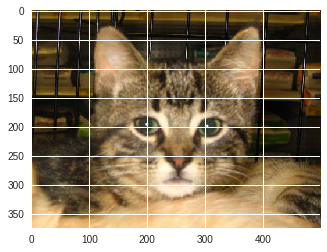

In [9]:
#Extract a subset of the files to verify they're there, and then show one image to check the image itself
files = os.listdir(f'{PATH}valid/cats')[:5]
files
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [11]:
#Run a pre-trained model (Resnet) on the system to assess baseline performance
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.056825   0.030339   0.9885    
    1      0.051914   0.026572   0.991     



[array([0.02657]), 0.991]

In [12]:
data.val_y
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape
log_preds[:10]

array([[-0.00028, -8.1876 ],
       [-0.00055, -7.5075 ],
       [-0.00056, -7.48034],
       [-0.00027, -8.22734],
       [-0.00333, -5.70552],
       [-0.00013, -8.91472],
       [-0.00033, -8.02633],
       [-0.00008, -9.40146],
       [-0.00083, -7.09677],
       [-0.00008, -9.45611]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)
  

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


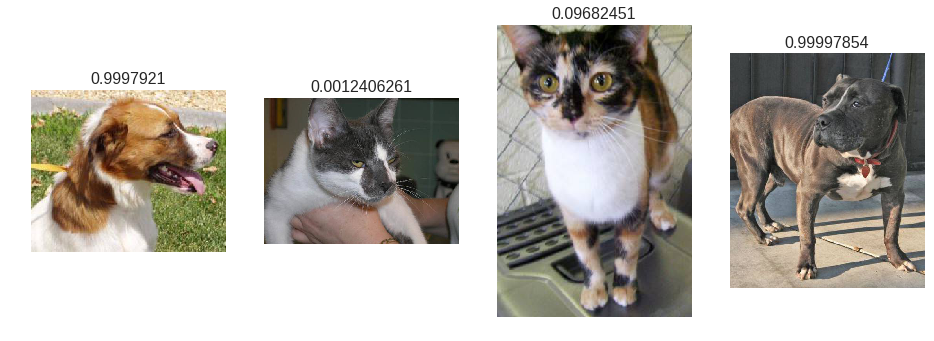

In [15]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


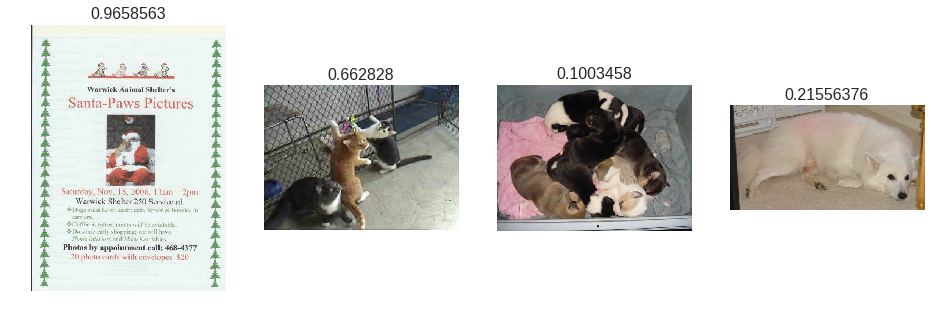

In [16]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")